#***#Task5*-SUPERMARKET DATA ANALYSIS**

**Intern name- Rahul Rajeev Mudatholy**

**1.Problem Statement**-As a business manager, try to find out the weak areas where you can work
to make more profit.
 What all business problems you can derive by exploring the data?

**2.Data**-: https://bit.ly/3i4rbWl

**The following are the project objectives-**

*   Performing EDA on the data to derive insights on how the profits can be increased.

*   Discovering the weak areas of the sales deparment in order to improve the sales.

*   Discovering hidden trends within the data that will allow the sales deparment to cater to region-specific needs of the buyers

In [1]:
#Importing the required modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

!pip install pywaffle --quiet
from pywaffle import Waffle

##**Reading the data**

In [2]:
SuperStore=pd.read_csv("SampleSuperstore.csv")

In [3]:
SuperStore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
SuperStore.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
SuperStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
SuperStore.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


**Since we will be working with some geographical plots, let us map the state names to state codes.**

In [7]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
SuperStore['state_code'] = SuperStore.State.apply(lambda x: state_code[x])

In [8]:
SuperStore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,state_code
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,KY
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,KY
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,CA
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,FL
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,FL


##**Exploratory Data Analysis**

**In this section, we will perform EDA on our dataset, with an aim to uncover the hidden trends within the data which might help the superstore to increase their profits.**

**First, let us have a look at the total sales per state and the revenue generated.**

In [9]:
state_data = SuperStore[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()


fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, 
    z = state_data.Sales, 
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = 'Sales in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    geo_scope='usa',
    height=800,
)

fig.show()


Observations from the above given geographical plot-


*   The company has the highest sales in the state of California (shown in dark maroon), selling around \$450K of goods.
*   New York (bright red, top right) is the state with the second highest sales, with more that \$300k worth of goods sold.

*   The states of Texas (bottommost, orange) and Washington (top left, orange) end up third and fourth on the top sales charts with around \$170K and 140K in sales respectively.
*   If we look at the overall data, we will observe that the supermarket company does most of its business in East Coast and West Coast region. **In fact, the total sales in the state of New York is more than the sales in all of the Central America combined**

In [10]:
fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, # Spatial coordinates
    z = state_data.Profit, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = [[0, 'rgb(255,0,0)'], [0.25, 'rgb(255,255,255)'], [0.45, 'rgb(124,208,247)'], [0.6, 'rgb(97,255,140)'], [1, 'rgb(8,181,0)']],
#     reversescale = True,
    colorbar_title = 'Profits in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Profit/Loss',
    geo_scope='usa', # limite map scope to USA
    height=800,
)

fig.show()

The observations from the above plot are:

*   The states in shades of green, namely New York, California and Washington are the most profitable for the company, with profits of over \$30K.
*   The states in teal and blue, with an average profit of around \$25K are mostly situated in the north-east and south-east region.

*  The state of Texas, with the third highest sales proved to be the most expensive state for the company with a very high loss of around \$25K






**Now, let us have a look at the profit to sales ratio of each state. The profit-to-sales ratio tells us how much the store has to sell in that state in order to make profit.**

1.The higher the profit-to-sales ratio, the more profit returns the store gets in the state for each sale they make.

2.A lower ratio denotes that the store has to make a lot more sales in order to make the same amount of profit as compared to a state with a higher profit-to-sales ratio.

3.States with a negative profit-to-sales ratio denote a higher loss on each sale they make.

These insights can help the supermarket in determining which state needs more attention as compared to the others.

In [11]:
# feature engineering price_to_sales ratio
state_data['profit_to_sales'] = state_data['Profit'] / state_data['Sales']

# adding state name
state_name = {v: k for k, v in state_code.items()}
state_data['States'] = state_data.index
state_data['States'] = state_data.States.apply(lambda x: state_name[x])

# sorting the dataframe
state_data = state_data.sort_values(by = ['profit_to_sales'], ascending=True)

In [12]:
fig = px.bar(state_data, x = 'profit_to_sales', y = 'States', title = 'PRICE TO SALES RATIO',
            color = 'Profit', color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(
    autosize=False,
    height=1000,
    xaxis = dict(
        tickmode = 'array',
        ticktext = state_data.States,
        title='Profit to Sales Ratio',
    ),
    yaxis=dict(title='State'),
)
fig.show()

Some interesting observations here.

*   Ohio has the worst profit-to-sales ratio in terms of total sales and the losses beared.
*   Delaware has the highest profit-to-sales ratio.


**The states making the largest profits for the company, namely New York, California and Washington DC don't have the highest profit-to-sales ratio. This means that the company can further improve its sales/profits in these states.**





Now, let us analyze the sales of a few random states from each profit bracket (high profit, medium profit, low profit, low loss and high loss) and try to observe some crucial trends which might help us in increasing the sales.

We have a few questions to answer here.

*   What products do the most profit making states buy?


*   What products do the loss bearing states buy?

*   What product segment needs to be improved in order to drive the profits higher?

These insights can help the supermarket in determining which state needs more attention as compared to the others.










In [13]:

def state_data_viewer(states):
    """Plots the turnover generated by different product categories and sub-categories for the list of given states.
    Args:
        states- List of all the states you want the plots for
    Returns:
        None
    """
    product_data = SuperStore.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (28,5))
        fig.suptitle(state, fontsize=14)        
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index +=1
        fig.show()

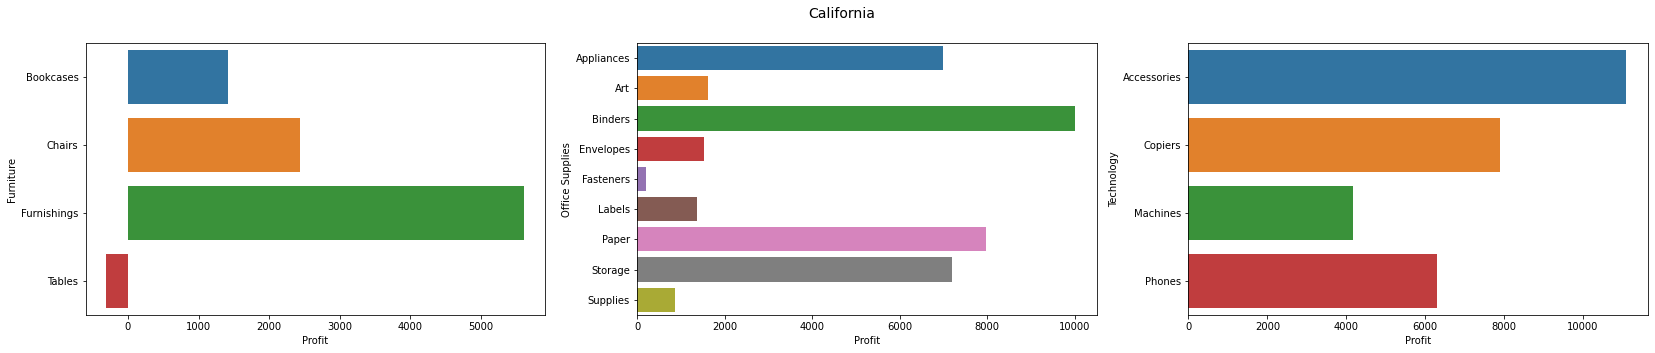

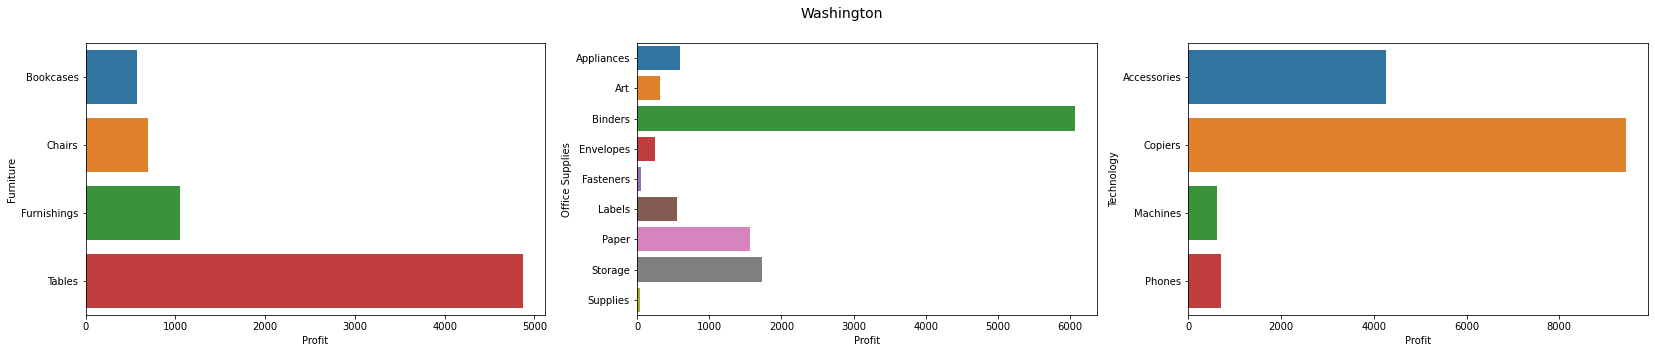

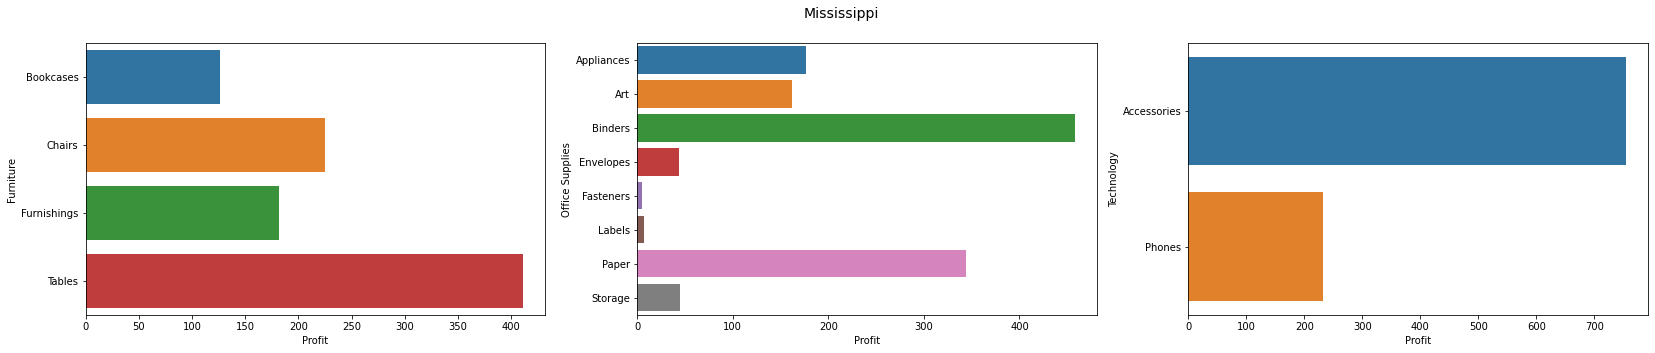

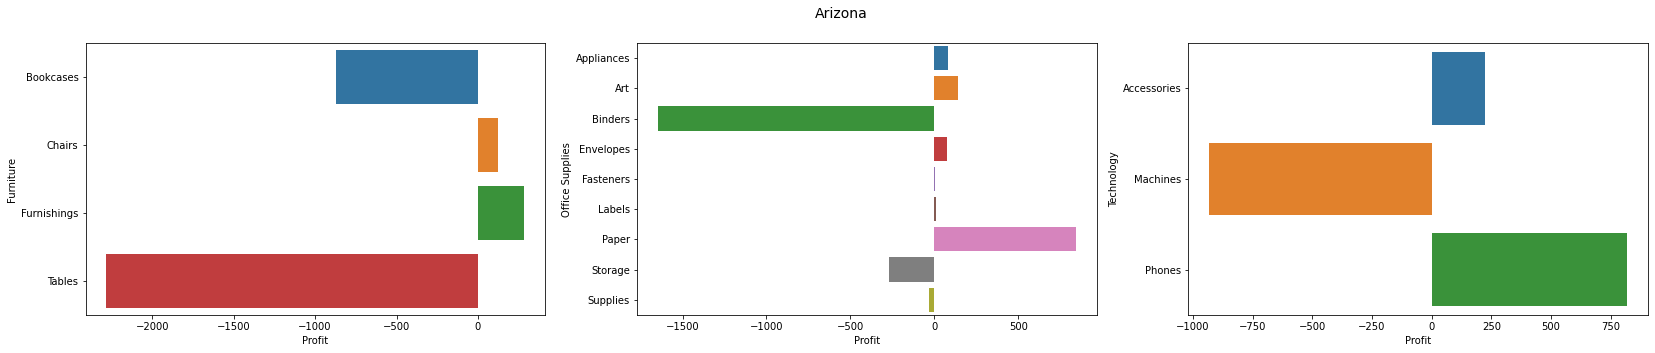

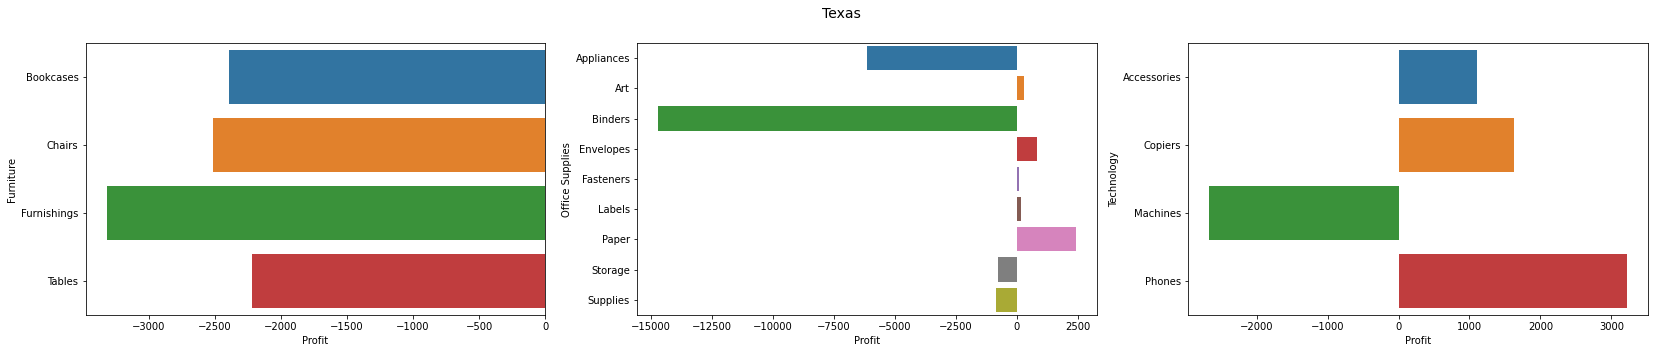

In [14]:
states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Texas']
state_data_viewer(states)

Observations and insights generated from the above given plots:



1.In the state of **California**, the highest revenue generating state for the supermarket, while all the products sold across each category are generating high-to-low profits, **tables** in **furniture category** is generating an overall loss. I verified the same with New York, the second highest revenue generating state.

2.**Washington**, has a very positive performance, with profits generating over all product categories. A few of the **low performing product sub categories** are- **bookcases**, **supplies, fasteners, machines and phones.** Overall, office supplies and **technology categories** make the most profit for the supermarket.

3.In the state of **Mississippi**, a **low profit generating state**, we see that the **Furniture category** performs slightly better than the other two categories. The **Technology category performs the worst**. I observed this same trend in other low profit generating states as well.

4.In **low-loss states like Arizona**, the highest loss generating sub-categories are- **Tables, binders, machines, storage, and book cases**.

5.In **Texas**, the highest loss state, **the furniture category** is going entirely in loss, generating massive losses for the supermarket. The performance is soo bad that the best option for the supermarket will be to end its **furniture business in the state**. In case of **office supplies category**, the **binders** (generally one of the highest revenue generating sub-category in other states) and appliances are one of the worst performers.



Now, let us analyze the sales made in each consumer segment.

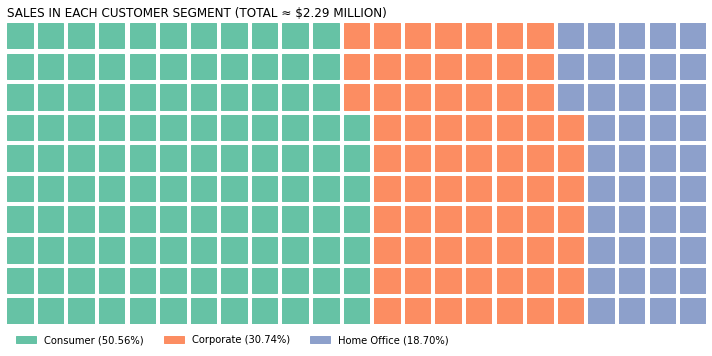

In [15]:
data = SuperStore[['Segment', 'Sales']].groupby(['Segment']).sum()

# #To plot the waffle Chart 
fig = plt.figure( 
    FigureClass = Waffle,
    figsize=(10, 10),
    rows = 10, 
    values = data.to_numpy()/10000,
    title={'label': 'Sales in Each Customer Segment (Total ≈ $2.29 million)'.upper(), 'loc': 'left'},
    labels=["{} ({:.2f}%)".format(label, percent) for label,percent in zip(list(data.index), (data.Sales/data.Sales.sum()*100).to_numpy())],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.1), 'ncol': len(data), 'framealpha': 0},
)

Observations from the plot above-

1.Around 50% of the total sales were made in the consumer segment which comprises of the individual buyers.

2.The Corporate sector and Home Office segments have around 31% and 19% sales respectively.

Now, let us analyze what percent of profits does each customer section makes for the supermarket

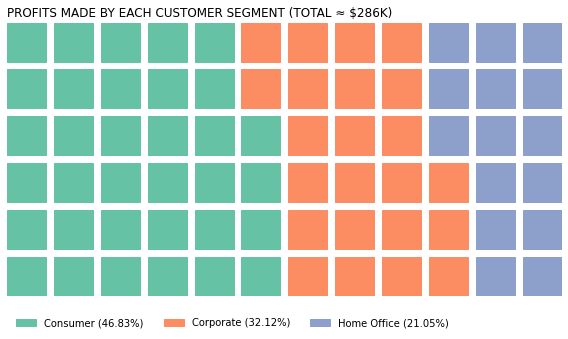

In [16]:
data = SuperStore[['Segment', 'Profit']].groupby(['Segment']).sum()

#To plot the waffle Chart 
fig = plt.figure( 
    FigureClass = Waffle,
    figsize=(8, 8),
    rows = 6, 
    values = data.to_numpy()/4000,
    title={'label': 'Profits made by Each Customer Segment (Total ≈ $286K)'.upper(), 'loc': 'left'},
    labels=["{} ({:.2f}%)".format(label, percent) for label,percent in zip(list(data.index), (data.Profit/data.Profit.sum()*100).to_numpy())],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.15), 'ncol': len(data), 'framealpha': 0},
)


Some interesting observations here.

1.While the Consumer segment had more than 50% in sales, its total contribution in the profits made by the company is only around 46%. This shows that the company is bearing a higher loss in the Consumer segment.

2.The Corporate and the Home Office segments are returning more profits to the supermarket as compared to the sales made. While their joint sales is around 50%, thier joint profits made for the supermarket is around 54%.

Here, the company can do two things in order to increase their profits. They can look into the reasons why they are bearing more losses in the consumer segment and try to reduce those losses, thus directly increasing the sales.

Other route the company can take is to providing more polished services to the Corporate and Home Office segments, thus driving them towards more profits.

**Now, let us observe the prices of products across each product category and try to see how the prices are spread across each product category.**

In [17]:
SuperStore['price_per_product'] = SuperStore.Sales /SuperStore.Quantity
SuperStore['profit_per_product'] = SuperStore.Profit / SuperStore.Quantity 

data = SuperStore.groupby(['Category'])

for cat, df in data:
    sizes = np.absolute(df.price_per_product)
    fig = px.scatter(df, x = 'price_per_product', title = cat.upper(), 
                    color = 'Sub-Category',
                    size = sizes, hover_data=['Sub-Category'])
    fig.update_layout(
        height = 600,
        xaxis = dict(title='Price Per Product'),
        yaxis = dict(title=''),
    )
    fig.show()

**Observation across each product category-**

**Furnitures-**

*   If we see the average price, we'll find that most of the tables and chairs are around the \$200 mark, making them one of the most expensive furniture items. Some tables go as high as USD 550 while the most expensive chair costs USD 700.
*   The most expensive item in the furniture category is a bookcase costing $880.





**Office Supplies-**

*   Most office supplies fall under the \$100 mark.
*   Binders and supplies are the most expensive categories, going as high as \$1890.





**Technology-**

*   As per the plot, products in the machines and copiers sub categories are the most expensive technology items.
*   Most products fall under the $200 price tag.






Now that we have seen the distribution of products across various price brackets, let us have a look at how much each product generates or loses in terms of revenue.

In [18]:
for cat, df in data:
    sizes = np.absolute(df.profit_per_product)
    fig = px.scatter(df, x = 'profit_per_product', title = cat.upper(), 
                    color = 'Sub-Category',
                    size = sizes, hover_data=['Sub-Category'])
    fig.update_layout(
        autosize = True,
        height = 600,
        xaxis = dict(title='Profit/Loss Per Product'),
        yaxis = dict(title=''),
    )
    fig.show()

**Observation across each product category-**

**Furnitures-**

*   Upon observing the plot, it is evident that tables are one of the businesses where the supermarket is losing most of its money.

*   Book cases is another business where the supermarket is mostly just bearing losses.
*   If we see the overall performance, chairs seem to be generating the highest profits for the supermarket.








**Office Supplies-**

While binders generate most revenue for the company, it is also one of the highest-loss sub-categories in the office supplies category.

**Technology-**

The company's machine sales cause the highest loss, going as high as \$1300 in loss.

While the scatter plot gives us a rough idea regarding how and in what sub category the supermarket is losing the money, it's still now clear how each sub category is performing considering the overall data. Let us have a look at the performance of each sub category.

In [19]:
for cat, df in data:
    subCat = df.groupby(['Sub-Category']).sum()
    fig = px.bar(subCat, y = 'Profit', title = cat.upper(), 
                    color = subCat.index)
    fig.update_layout(
        autosize = True,
        width = 800,
        yaxis = dict(title='Profit/Loss Per Product Sub-Category'),
        xaxis = dict(title=''),
    )
    fig.show()

**From the above given plots, it is clear that-**

1.**Tables and Bookcases** are the businesses where the company is **losing most of its money.**

2.While the technology business is making most of the profits for the company, the machines business makes the least profit. The supermarket can improve in that sub-category.

3.Considering the combined turnover from each category, the furniture business is where the company is barely making any consideraable profit. Maybe the shipping modes and shipping costs for the furniture products, which are usually large, has something to do with the low profits/high losses.

**Let us have a look at what role the various shipping modes has to play in all this.**

First, let us have a look at which shipping method different consumer segments use the most for buying products in different product categories.

In [22]:
ship_segment = SuperStore.groupby(['Segment'])
segment_list = SuperStore.Segment.value_counts().index
cat_list = SuperStore.Category.value_counts().index

for segment in segment_list:
    seg_shipping = ship_segment.get_group(segment)
    standard, second, first, same = [], [], [], []
    for cat in cat_list:
        count = seg_shipping.groupby(['Category']).get_group(cat)['Ship Mode'].value_counts()
        standard.append(count[0]), second.append(count[1]), first.append(count[2]), same.append(count[3])
        
    fig = go.Figure()
    fig.add_trace(go.Bar(x = cat_list,y = standard,name='Standard Class',marker_color='rgb(137,51,51)'
                        ))
    fig.add_trace(go.Bar(x = cat_list,y = second,name='Second Class',marker_color='rgb(234,84,84)'
                        ))
    fig.add_trace(go.Bar(x = cat_list,y = first,name='First Class',marker_color='rgb(250,127,78)'
                        ))
    fig.add_trace(go.Bar(x = cat_list,y = same,name='Same Day',marker_color='lightsalmon'
                        ))

    fig.update_layout(
        barmode ='group',
        width = 800,
        title = segment.upper(),
        yaxis = dict(title = 'Number of Deliveries'))
    fig.show()

**Observations from the above given plot-**

1.Standard class shipping is the most used shipping method across all consumer segments and product categories.

2.Across all three consumer segments, office supplies are the most bought products, and the technology items are the least bought products.

Now, let us consider how much loss each shipping category bears.

In [23]:
SuperStore['loss'] = SuperStore.Profit.apply(lambda x: x if (x < 0) else 0)

fig = px.bar(SuperStore,x = 'Ship Mode', y = 'loss', title = 'Losses in Each Shipping Category'.upper(), 
                    color = 'Ship Mode', hover_data=['loss', 'Sub-Category'])
fig.update_layout(
        autosize = True,
        width = 800,
        yaxis = dict(title='Total Loss'),
        xaxis = dict(title='Shipping Class'),
    )
fig.show()

**Observations from the plot above-**

1.The **highest loss** beared by the company was while delivering products via the **standard class shipping**. This is of no surprise, since most products were delivered using standard shipping. However, one important thing to be noted is that some of the biggest losses beared by the superstore also fall under the standard shipping category, one going as **high as \$6,600 in a single sale.**

2.First and second class shipping have almost equal losses. This is also no surprise since the number of sales shipped under each shipping category were also almost equal.

Apart from this information, it doesn't seem that shipping has a major effect on profits or losses as such.

**Now, for the last part of our EDA section, we will see how discounts affect the sale of products and the revenue generated by it.**

In [26]:
SuperStore['whether_discount'] = SuperStore.Discount.apply(lambda x: 'No Discount' if (x == 0) else 'Discount')

discount_data = SuperStore.groupby(['whether_discount']).mean()

def discount_plotter(data_type = 'total'):
    """Plots discount data related plots.
    Args:
        data_type- 'total' or 'average', depending on you want the average statistics or total stats.
    """
    color = ['rgb(81,81,246)', 'rgb(209,70,70)']
    if data_type == 'average':
        discount_data = SuperStore.groupby(['whether_discount']).mean()
        fig = make_subplots(rows=1, cols=3, subplot_titles=('AVERAGE SALE', 'AVERAGE PROFIT/LOSS', 'AVERAGE PRICE PER PRODUCT'))
    else:
        discount_data = SuperStore.groupby(['whether_discount']).sum()
        fig = make_subplots(rows=1, cols=3, subplot_titles=('TOTAL SALE', 'TOTAL PROFIT/LOSS', 'TOTAL PRICE PER PRODUCT'))
    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data.Sales, marker_color = color),
            row=1, col=1
    )

    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data.Profit, marker_color = color),
            row=1, col=2
    )

    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data.price_per_product, marker_color = color),
            row=1, col=3
    )
    fig.update_layout(showlegend=False)
    fig.show()
    

discount_plotter('average')
discount_plotter()

**Observations from the above given plots**-


*   Considering both average and total sales, it seems that **people tend to buy more things when it is selling at a discounted price**. An average sale at discounted price is of around **USD 232** as compared to **USD 226** **on undiscounted price**
*   On an average, a **discounted sale results in a loss of around USD 6** as compared to around **USD 66 in profit on a non-discounted sale**. Also, the company made a total **profit of around USD 320K on non-discount sales**, as compared to a **loss of around USD 34K on discounted sales.**

*   The **average price of a discounted product** is around **USD 62**, while the same is around USD 58 for a non-discounted item



***One thing to be noted is that while the superstore is incurring losses due to giving discounts on its products, they can't stop giving discounts of their products. Most of the heavy discounts are during festivals, end-of-season and clearance sales which are necessary so that the store can make space in their warehouses for fresh stock. Also, by incurring small losses, the company gains in the future by attracting more long term customers. Therefore, the small losses from discounts are an essential part of company's business.***

